## **Langkah 1: Memuat Data Sentimen Intensif Mobil Listrik Indonesia**
Data ini merupakan komentar-komnetar masyarakat terkait pemeberlakuan intensif mobil listrik di Indonesia. Komentar-komentar yang digunakan merupakan komentar yang diambil dari berbagai video yang membahasa tentang "Pemeberlakuan Intensif Mobil Listrik" pada platform Youtube. Data ini saya ambil melalui situs Kaggle: https://www.kaggle.com/datasets/billycemerson/analisis-sentimen-terkait-intensif-mobil-listrik

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Membaca data CSV
data = pd.read_csv("mobil_listrik.csv")

# Menampilkan beberapa baris pertama data
data.head()


,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


# **Langkah 2: Visualisasi Data**
disini saya ingin melihat terlebih dahulu seberapa banyak jarak antara sentimen yang berbeda dalam dataset. Dengan kata lain, saya ingin memahami sejauh mana model kita dapat membedakan antara sentimen positif, negatif, dan netral. Nanti kita lihat metrik evaluasi seperti akurasi, presisi, dan recall, kita dapat mendapatkan pemahaman yang lebih dalam tentang seberapa baik model ini dapat mengenali sentimen yang berbeda.

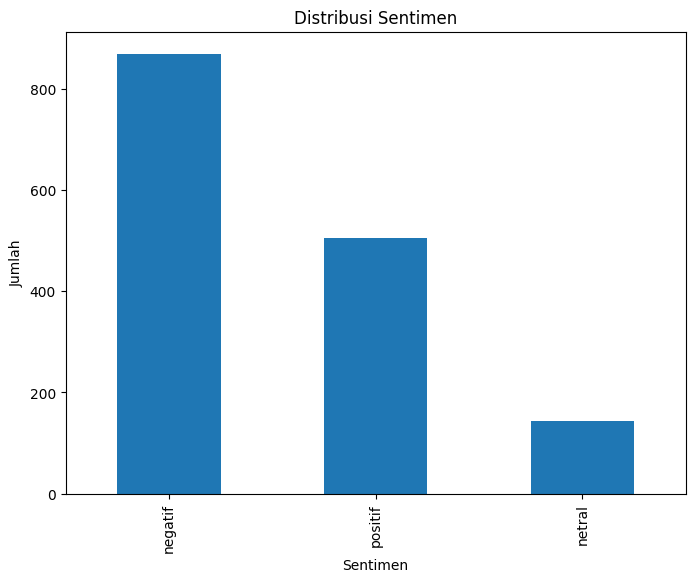

In [18]:
# Visualisasi distribusi sentimen
sentimen_counts = data['sentimen'].value_counts()
sentimen_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

# **Langkah 3: Pra-pemrosesan Teks**
Pra-pemrosesan teks melibatkan langkah-langkah seperti penghapusan karakter khusus, tokenisasi, dan penghapusan kata stop

In [20]:
nltk.download('punkt')

# Menghapus karakter khusus
def remove_special_characters(text):
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text

# Mengonversi teks menjadi string jika belum
data['text_cleaning'] = data['text_cleaning'].apply(lambda x: str(x))

# Tokenisasi
data['text_cleaning'] = data['text_cleaning'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])

# Menampilkan beberapa baris pertama data setelah tokenisasi
print(data['text_cleaning'].head())

0    [saran, sih, bikin, harga, ionic, sama, kayak,...
1    [problem, subsidi, kualitas, diturunin, harga,...
2    [baik, kualitas, kembang, dulu, baik, kualitas...
3    [model, jelek, kwalitas, buruk, harga, mahal, ...
4    [syarat, ngaco, woy, anak, muda, blom, punya, ...
Name: text_cleaning, dtype: object


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **Langkah 4: Ekstraksi Fitur**
menggunakan metode TF-IDF

In [21]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text_cleaning'].apply(lambda x: ' '.join(x)))

# **Langkah 5: Pembagian Data**

In [22]:
X = tfidf_matrix
y = data['sentimen']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Langkah 6: Pelatihan Model**
model Machine Learning untuk klasifikasi sentimen, disini saya menggunakan SVM

In [23]:
# Inisialisasi dan pelatihan model
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Memprediksi sentimen pada data pengujian
y_pred = svm_classifier.predict(X_test)


# **Langkah 7: Evaluasi Model**
Evaluasi model menggunakan metrik seperti akurasi, presisi, dan recall


In [24]:
# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

# Laporan klasifikasi
print(classification_report(y_test, y_pred))


Akurasi: 0.77
              precision    recall  f1-score   support

     negatif       0.78      0.91      0.84       176
      netral       1.00      0.06      0.12        31
     positif       0.73      0.74      0.74        97

    accuracy                           0.77       304
   macro avg       0.84      0.57      0.57       304
weighted avg       0.79      0.77      0.74       304



# **Kesimpulan**
Berdasarkan hasil visualisasi dan evaluasi model berikut adalah simpulan yang dapat diambil:

* **Melihat Visualisasi Sentimen**:
Sentimen negatif memiliki frekuensi tertinggi dengan lebih dari 850 entri.
Sentimen positif memiliki frekuensi sekitar 500 entri.
Sentimen netral memiliki frekuensi yang paling rendah, dengan hanya sekitar 100 entri.
Ini menunjukkan bahwa dataset memiliki distribusi sentimen yang tidak seimbang, dengan jumlah entri negatif yang jauh lebih banyak daripada positif dan netral.

* Evaluasi Model:
Akurasi model adalah sekitar 0.77, yang berarti model dapat mengklasifikasikan sekitar 77% dari data dengan benar secara keseluruhan.
Detail kinerja model untuk setiap sentimen:

* 1. Untuk sentimen negatif, model memiliki presisi sekitar 0.78, recall sekitar 0.91, dan f1-score sekitar 0.84. Ini menunjukkan bahwa model baik dalam mengidentifikasi sentimen negatif dan memiliki tingkat recall yang baik untuk sentimen ini.

* 2. Untuk sentimen netral, model memiliki presisi sekitar 1.00, recall yang sangat rendah (0.06), dan f1-score yang rendah (0.12). Recall yang rendah menunjukkan bahwa model hampir tidak dapat mengidentifikasi sentimen netral dengan baik.
* 3. Untuk sentimen positif, model memiliki presisi sekitar 0.73, recall sekitar 0.74, dan f1-score sekitar 0.74. Model memiliki kinerja yang cukup baik dalam mengidentifikasi sentimen positif, tetapi tidak sebaik dalam mengidentifikasi sentimen negatif.

Dengan demikian, model ini tampaknya memiliki kinerja yang baik dalam mengenali sentimen negatif, sedangkan kinerjanya lebih rendah dalam mengenali sentimen netral. Jadi, selisih antara hasil sentimen negatif dan positif adalah sekitar 0.17. Dengan kata lain, masyarakat cenderung kurang setuju dengan adanya mobil listrik di indonesia berdasarkan data tersebut.